## Import

In [47]:
import pandas as pd
import dask.dataframe as dd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# dask .read_csv for better performance on bigger dataset
df = dd.read_csv('data/cleaned_cdc_covid19.csv')

# subset deaths to yes, then convert to Pandas
df = df[df['death_yn']=='Yes'].compute()
df

,Unnamed: 0,case_month,res_state,res_county,age_group,sex,race,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
11445,11511,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11446,11512,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
11447,11513,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11448,11514,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11449,11515,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299677,223177,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
299678,223178,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
299679,223179,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
299680,223180,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing


In [49]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245028 entries, 11445 to 299681
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   case_month                245028 non-null  object
 1   res_state                 245028 non-null  object
 2   res_county                245028 non-null  object
 3   age_group                 245028 non-null  object
 4   sex                       243954 non-null  object
 5   race                      245028 non-null  object
 6   process                   245028 non-null  object
 7   exposure_yn               245028 non-null  object
 8   current_status            245028 non-null  object
 9   symptom_status            245028 non-null  object
 10  hosp_yn                   245028 non-null  object
 11  icu_yn                    245028 non-null  object
 12  death_yn                  245028 non-null  object
 13  underlying_conditions_yn  245028 non-null  object
dtype

In [51]:
df

,case_month,res_state,res_county,age_group,sex,race,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
11445,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11446,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
11447,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11448,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11449,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299677,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
299678,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
299679,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
299680,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing


## Cleaning

### res_state

In [32]:
df = df[(df['res_state'] != 'PR') | (df['res_state'] != 'GU') | (df['res_state'] != 'VI')]
df

,case_month,res_state,res_county,age_group,sex,race,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
11445,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11446,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
11447,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11448,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
11449,2020-04,IN,HAMILTON,Missing,NaN,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299677,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
299678,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,Missing
299679,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
299680,2020-12,AZ,YUMA,65+ years,Male,White,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing


In [52]:
df['res_state'].value_counts()

CA    43407
NY    34637
FL    20910
IL    19104
PA    13812
NJ    13785
MA    13760
OH    12738
AZ    11773
IN     6208
MI     6158
TN     4491
MN     4191
CT     3774
NV     3470
CO     3163
WI     2919
AL     2830
SC     2747
NC     2651
KS     2444
WA     2137
PR     1877
AR     1760
VA     1555
OK     1315
KY     1158
MS     1134
IA      951
ID      843
UT      661
DC      611
OR      518
MT      435
NH      320
LA      319
ME      185
GA      169
ND       71
VT       25
RI       12
Name: res_state, dtype: int64

## EDA

### case_month

In [53]:
df['case_month'].value_counts()

2020-04    54678
2020-12    51178
2020-11    30550
2021-01    29821
2020-03    17610
2020-05    14152
2020-07    12957
2020-10    10674
2020-08     7488
2020-06     6545
2021-02     4859
2020-09     4214
2021-03      163
2020-02      139
Name: case_month, dtype: int64

In [54]:
month_count_df = df.groupby('case_month') \
                    .agg({'death_yn':'count'}) \
                    .reset_index()
        
month_count_df.rename(columns={'death_yn' : 'count'}, inplace=True)

month_count_df

,case_month,count
0,2020-02,139
1,2020-03,17610
2,2020-04,54678
3,2020-05,14152
4,2020-06,6545
5,2020-07,12957
6,2020-08,7488
7,2020-09,4214
8,2020-10,10674
9,2020-11,30550


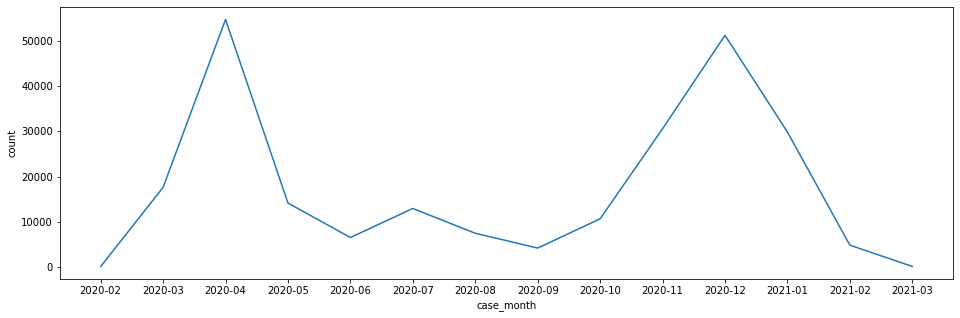

In [55]:
fig, ax = plt.subplots(figsize=(16,5))

sns.lineplot(x='case_month', y='count', data=month_count_df,
             sort=False);

### res_state

In [56]:
df['res_state'].value_counts()

CA    43407
NY    34637
FL    20910
IL    19104
PA    13812
NJ    13785
MA    13760
OH    12738
AZ    11773
IN     6208
MI     6158
TN     4491
MN     4191
CT     3774
NV     3470
CO     3163
WI     2919
AL     2830
SC     2747
NC     2651
KS     2444
WA     2137
PR     1877
AR     1760
VA     1555
OK     1315
KY     1158
MS     1134
IA      951
ID      843
UT      661
DC      611
OR      518
MT      435
NH      320
LA      319
ME      185
GA      169
ND       71
VT       25
RI       12
Name: res_state, dtype: int64

In [57]:
len(df['res_state'].value_counts())

41